In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("datasets/3_stephen_curry_shot_chart_2023.csv")

df['time_remaining'] = [np.inner(np.array([60,1]),np.array([int(y) for y in x.split(':')])) for x in df['time_remaining']]

In [32]:
df

,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color
0,63,300,"Oct 18, 2022",1st Qtr,447,False,2,6,True,9,6,LAL,GSW,2023,red
1,133,389,"Oct 18, 2022",1st Qtr,442,True,2,17,True,11,6,LAL,GSW,2023,green
2,326,247,"Oct 18, 2022",1st Qtr,431,False,3,27,True,11,6,LAL,GSW,2023,red
3,249,89,"Oct 18, 2022",1st Qtr,316,False,3,25,True,19,13,LAL,GSW,2023,red
4,282,158,"Oct 18, 2022",1st Qtr,232,False,3,24,True,22,17,LAL,GSW,2023,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,185,79,"May 12, 2023",4th Qtr,514,False,2,21,False,80,100,LAL,GSW,2023,red
1430,193,19,"May 12, 2023",4th Qtr,508,False,3,26,False,80,100,LAL,GSW,2023,red
1431,332,214,"May 12, 2023",4th Qtr,383,False,3,28,False,85,108,LAL,GSW,2023,red
1432,310,240,"May 12, 2023",4th Qtr,371,True,3,26,False,88,108,LAL,GSW,2023,green


# Scatter

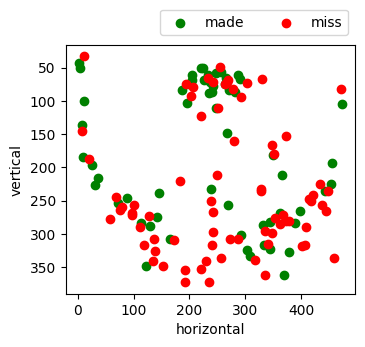

In [147]:
clutch_shots = df[(df['time_remaining'] < 120) & (abs(df['lebron_team_score'].subtract(df['opponent_team_score'])) < 6)]

clutch_shots_true = clutch_shots[(clutch_shots['result'] == True)]
clutch_shots_false = clutch_shots[(clutch_shots['result'] == False)]

f, ax = plt.subplots(1, 1, figsize=(15/4,29/8))

ax.scatter(x = clutch_shots_true['left'], y = clutch_shots_true['top'], c='green', label='made')
ax.scatter(x = clutch_shots_false['left'], y = clutch_shots_false['top'], c='red', label='miss')
ax.invert_yaxis()
ax.set_xlabel('horizontal')
ax.set_ylabel('vertical')

ax.legend(ncols=2, loc=1, bbox_to_anchor=(1.0, 1.17))
plt.tight_layout()
plt.savefig('nba_scatter.png')
plt.show()

# Histogram

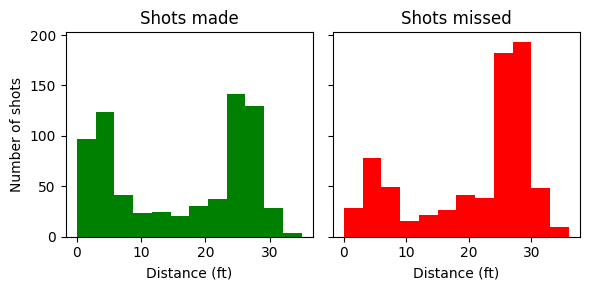

In [152]:
f, axl = plt.subplots(1, 2, figsize=(6,3), sharey=True)

shots_true = df[(df['result'] == True)]
shots_false = df[(df['result'] == False)]

ax = axl[0]
ax.hist(shots_true['distance_ft'], bins=12, color='green')
ax.set_title('Shots made')
ax.set_ylabel('Number of shots')
ax.set_xlabel('Distance (ft)')

ax = axl[1]
ax.hist(shots_false['distance_ft'], bins=12, color='red')
ax.set_title('Shots missed')
ax.set_xlabel('Distance (ft)')

plt.tight_layout()
plt.savefig('nba_hist.png')
plt.show()

# Bar

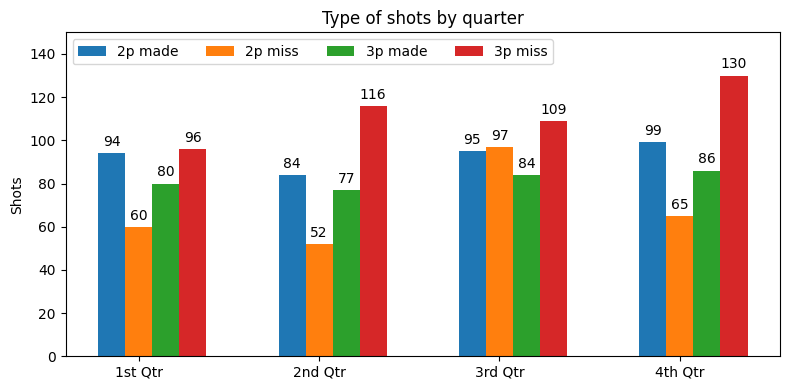

In [153]:
shots_by_quarter = df[df['qtr'] != '1st OT'].groupby('qtr')

new_data = {}
for quarter, shots in shots_by_quarter.groups.items():
    list_of_shots = df.iloc[shots.values]
    new_data[quarter] = {
        '2p made': list_of_shots[(list_of_shots['result'] == True) & (list_of_shots['shot_type'] == 2)].shape[0],
        '2p miss': list_of_shots[(list_of_shots['result'] == False) & (list_of_shots['shot_type'] == 2)].shape[0],
        '3p made': list_of_shots[(list_of_shots['result'] == True) & (list_of_shots['shot_type'] == 3)].shape[0],
        '3p miss': list_of_shots[(list_of_shots['result'] == False) & (list_of_shots['shot_type'] == 3)].shape[0],
    }

new_df = pd.DataFrame(new_data)

f, ax = plt.subplots(figsize=(8,4))

x = np.arange(len(new_data.keys()))
width = 0.15
multiplier = 0

for attr, meas in new_df.T.items():
    offset = width*multiplier
    rects = ax.bar(x + offset, meas.values, width, label=attr)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Shots')
ax.set_title('Type of shots by quarter')
ax.set_xticks(x + width, list(new_data.keys()))
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 150)

plt.tight_layout()
plt.savefig('nba_bar.png')
plt.show()

# Line

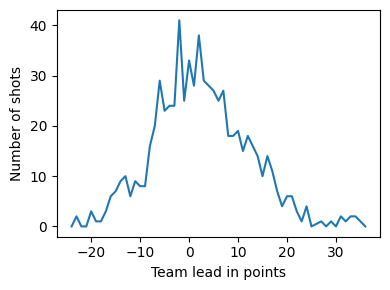

In [151]:
df2 = df.copy()

df2['diff'] = df['lebron_team_score'].subtract(df['opponent_team_score'])
df2['result'] = df2['result'].astype(int)

df2 = df2.loc[:, ['diff', 'result']].sort_values(by='diff')

df2_grouped = df2.groupby('diff').agg('sum').reset_index()

f, ax = plt.subplots(figsize=(4,3))

ax.plot(df2_grouped['diff'], df2_grouped['result'])

ax.set_xlabel('Team lead in points')
ax.set_ylabel('Number of shots')

plt.tight_layout()
plt.savefig('nba_line.png')
plt.show()

In [135]:
df2_grouped

,result
diff,
-24,0
-23,2
-22,0
-21,0
-20,3
-19,1
-18,1
-17,3
-16,6


In [104]:
for attr, meas in new_df.T.items():
    print(attr, meas)

2p made 1st Qtr    94
2nd Qtr    84
3rd Qtr    95
4th Qtr    99
Name: 2p made, dtype: int64
2p miss 1st Qtr    60
2nd Qtr    52
3rd Qtr    97
4th Qtr    65
Name: 2p miss, dtype: int64
3p made 1st Qtr    80
2nd Qtr    77
3rd Qtr    84
4th Qtr    86
Name: 3p made, dtype: int64
3p miss 1st Qtr     96
2nd Qtr    116
3rd Qtr    109
4th Qtr    130
Name: 3p miss, dtype: int64
